In [74]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns

In [75]:
PATH = '../data/'
df = pd.read_csv(PATH + 'raw_data.csv')
df

,IMAGE_VERSION_1,IMAGE_VERSION_2,IMAGE_VERSION_3
0,https://static.zara.net/photos///2024/V/0/3/p/...,https://static.zara.net/photos///2024/V/0/3/p/...,https://static.zara.net/photos///2024/V/0/3/p/...
1,https://static.zara.net/photos///2024/V/0/3/p/...,https://static.zara.net/photos///2024/V/0/3/p/...,https://static.zara.net/photos///2024/V/0/3/p/...
2,https://static.zara.net/photos///2024/V/0/1/p/...,https://static.zara.net/photos///2024/V/0/1/p/...,https://static.zara.net/photos///2024/V/0/1/p/...
3,https://static.zara.net/photos///2024/V/0/2/p/...,https://static.zara.net/photos///2024/V/0/2/p/...,https://static.zara.net/photos///2024/V/0/2/p/...
4,https://static.zara.net/photos///2024/V/0/2/p/...,https://static.zara.net/photos///2024/V/0/2/p/...,https://static.zara.net/photos///2024/V/0/2/p/...
...,...,...,...
49313,https://static.zara.net/photos///2021/I/4/1/p/...,https://static.zara.net/photos///2021/I/4/1/p/...,NaN
49314,https://static.zara.net/photos///2024/V/0/3/p/...,https://static.zara.net/photos///2024/V/0/3/p/...,https://static.zara.net/photos///2024/V/0/3/p/...
49315,https://static.zara.net/photos///2024/V/1/3/p/...,https://static.zara.net/photos///2024/V/1/3/p/...,https://static.zara.net/photos///2024/V/1/3/p/...
49316,https://static.zara.net/photos///2024/V/0/3/p/...,https://static.zara.net/photos///2024/V/0/3/p/...,https://static.zara.net/photos///2024/V/0/3/p/...


In [76]:
ROWS = df.shape[0]
COLS = df.shape[1]

In [77]:
from PIL import Image, ImageDraw
import requests
from io import BytesIO
import matplotlib.pyplot as plt


In [105]:
IMAGES = 10

In [79]:
def get_image(URL):
    request = requests.get(URL)
    img = Image.open(BytesIO(request.content))
    return img

In [80]:
url = df.iloc[7, 2]


In [81]:
images = []
for i in range(3):
    for j in range(COLS):
        url = df.iloc[i, j]
        if pd.isna(url):
            continue
        image = get_image(url)
        images.append(image.resize((128,128)))

In [82]:
def showfoto(x):
    img = Image.fromarray(x)
    plt.figure(figsize=(8, 6))  # Example: 8 inches wide by 6 inches tall

    # Display the image using `matplotlib`
    plt.imshow(img)
    plt.axis('off')  # Optional: Hide the axis labels for a cleaner display
    plt.show()

Image shape: (128, 128, 3)
[[[234 235 239]
  [234 235 239]
  [234 235 239]
  ...
  [225 230 234]
  [225 230 234]
  [225 229 234]]

 [[234 235 239]
  [234 235 239]
  [234 235 239]
  ...
  [226 229 234]
  [226 229 234]
  [225 230 234]]

 [[234 235 238]
  [234 235 238]
  [234 235 239]
  ...
  [225 230 234]
  [225 230 234]
  [225 230 234]]

 ...

 [[232 230 225]
  [231 230 225]
  [231 230 225]
  ...
  [227 226 221]
  [227 226 221]
  [227 226 221]]

 [[230 229 224]
  [230 229 224]
  [230 229 224]
  ...
  [227 226 221]
  [227 226 221]
  [227 226 221]]

 [[230 229 224]
  [230 229 224]
  [230 229 224]
  ...
  [227 226 221]
  [227 226 221]
  [227 226 221]]]
Image shape: (128, 128, 3)
[[[233 234 238]
  [233 234 238]
  [233 234 238]
  ...
  [224 227 232]
  [223 228 232]
  [224 227 232]]

 [[233 234 237]
  [233 234 238]
  [233 234 238]
  ...
  [223 228 232]
  [223 228 232]
  [223 228 232]]

 [[233 234 236]
  [233 234 236]
  [233 234 237]
  ...
  [224 229 233]
  [224 228 232]
  [224 227 232]]

 ...

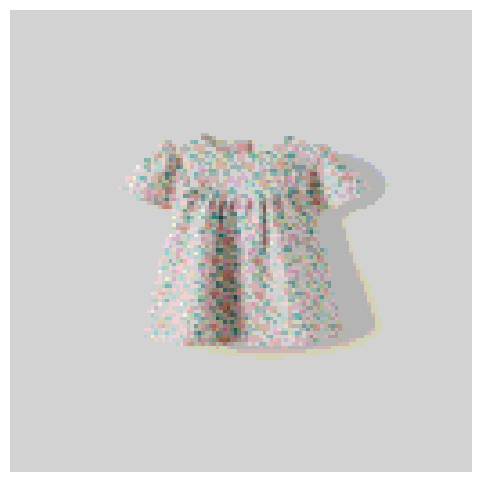

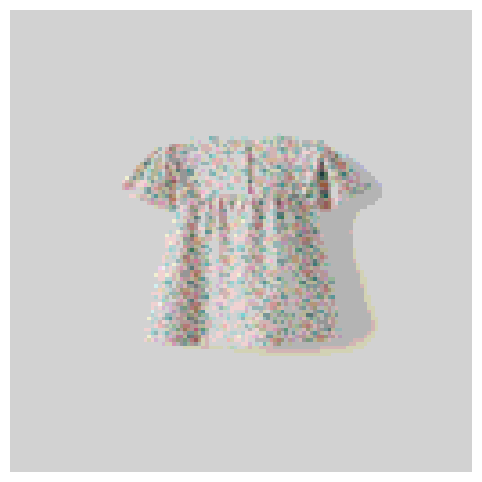

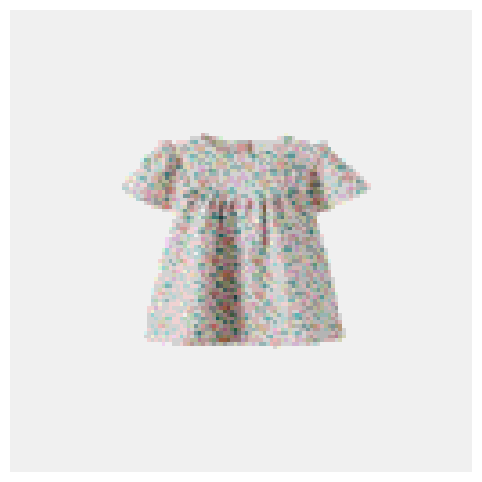

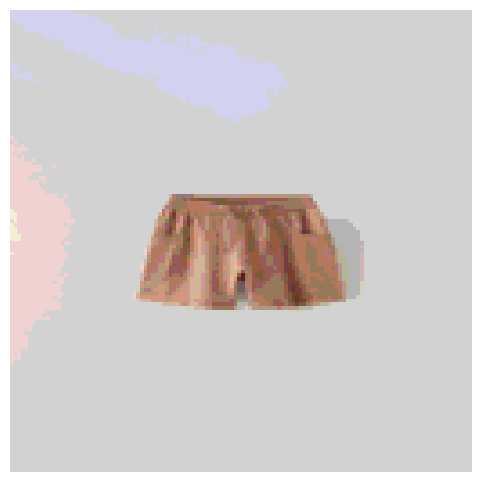

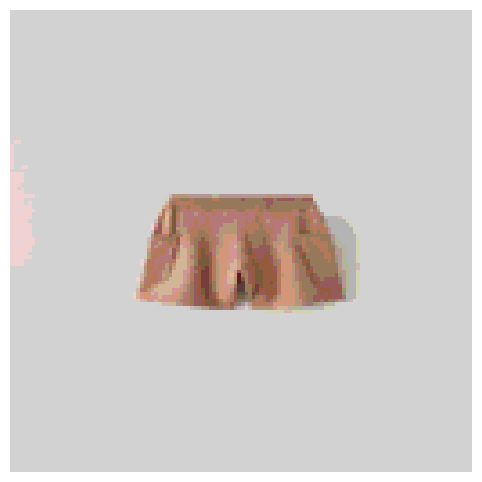

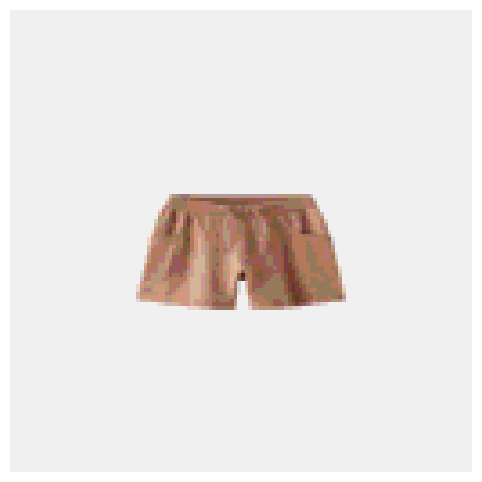

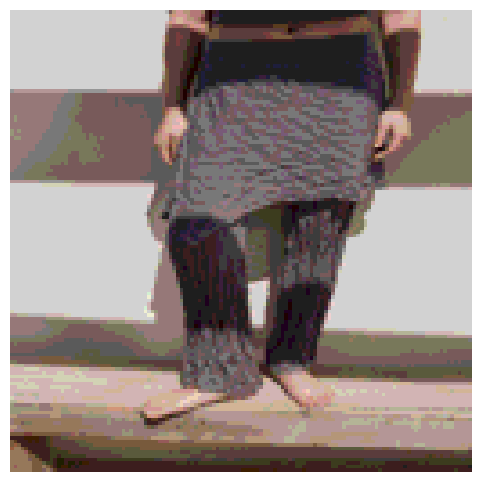

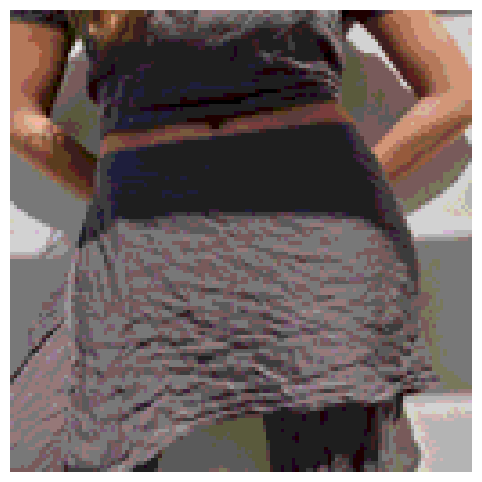

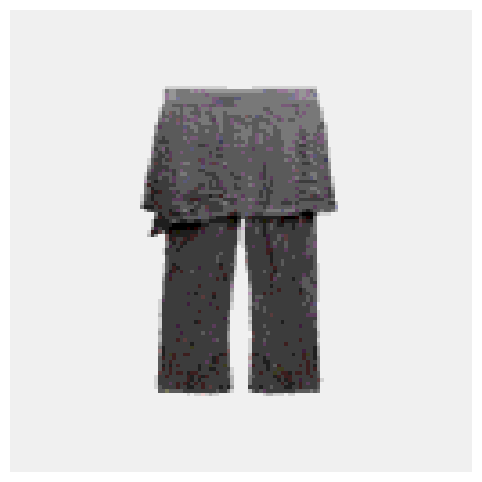

In [83]:
images2 = []
for x in images:

    # Convert the image data to a NumPy array
    img_array = np.array(x)

    # Display the shape and data of the resulting array
    print(f"Image shape: {img_array.shape}")
    print(img_array)
    images2.append(img_array)

for x in images2:
    x//=30
    x*=30
    
    showfoto(x)
    

In [106]:
images = []

In [107]:
def take_batch(start, end):
    for i in range(start, min(end, urls.shape[0])):
        for j in range(urls.iloc[i].shape[0]):
            url = urls.iloc[i][j]

            print(i, j, url)

            if type(url) != str:
                continue

            try:
                data = requests.get(url).content
                
                f = open(f'{i}_{j}','wb')
                f.write(data)
                f.close()
                
                img = Image.open(f"{i}_{j}")
                images.append(np.array(img.resize((128,128))))

            except Image.UnidentifiedImageError:
                continue
     

def display_row(index):
    images = []
    for i in range(3):
        try:
            image = mpimg.imread(f"{index}_{i}")
            images.append(image.resize((128,128)))
        except:
            continue

    num = len(images)

    f, axarr = plt.subplots(1, num)

    for i in range(num):
        axarr[i].imshow(images[i])
        axarr[i].get_xaxis().set_visible(False)
        axarr[i].get_yaxis().set_visible(False)

In [108]:
urls = pd.read_csv("../data/raw_data.csv")

take_batch(0, IMAGES)

0 0 https://static.zara.net/photos///2024/V/0/3/p/5767/521/712/2/w/2048/5767521712_6_1_1.jpg?ts=1707751045954
0 1 https://static.zara.net/photos///2024/V/0/3/p/5767/521/712/2/w/2048/5767521712_6_2_1.jpg?ts=1707751045737
0 2 https://static.zara.net/photos///2024/V/0/3/p/5767/521/712/2/w/2048/5767521712_3_1_1.jpg?ts=1707751046435
1 0 https://static.zara.net/photos///2024/V/0/3/p/5536/532/658/2/w/2048/5536532658_6_1_1.jpg?ts=1710428896326
1 1 https://static.zara.net/photos///2024/V/0/3/p/5536/532/658/2/w/2048/5536532658_6_2_1.jpg?ts=1710428896373
1 2 https://static.zara.net/photos///2024/V/0/3/p/5536/532/658/2/w/2048/5536532658_3_1_1.jpg?ts=1710428894764
2 0 https://static.zara.net/photos///2024/V/0/1/p/2893/010/818/17/w/2048/2893010818_1_1_1.jpg?ts=1713965800221
2 1 https://static.zara.net/photos///2024/V/0/1/p/2893/010/818/17/w/2048/2893010818_2_1_1.jpg?ts=1713965805677
2 2 https://static.zara.net/photos///2024/V/0/1/p/2893/010/818/2/w/2048/2893010818_3_1_1.jpg?ts=1708506892071
3 0 http

In [109]:
len(images)

14

In [110]:
images[0].shape

(128, 128, 3)

In [111]:
COLOR_BINS = 8

def computehist(x):
    BIN_SIZE = 256 // COLOR_BINS
    rgbhistogram = [[[0 for _ in range(COLOR_BINS)] for __ in range(COLOR_BINS)] for ___ in range(COLOR_BINS)]
    for i in x:
        for j in i:
            rgbhistogram[j[0]//BIN_SIZE][j[1]//BIN_SIZE][j[2]//BIN_SIZE] += 1
    return rgbhistogram

def dist(x,y):
    mxx = 0
    mxy = 0
    for i in range(len(x)):
        for j in range(len(x[0])):
            for k in range(len(x[0][0])):
                mxx = max(mxx, x[i][j][k])
                mxy = max(mxy, y[i][j][k])
                
    cnt = 0
    for i in range(len(x)):
        for j in range(len(x[0])):
            for k in range(len(x[0][0])):
                if (x[i][j][k] == mxx):
                    continue
                if (y[i][j][k] == mxy):
                    continue
                
                cnt+=x[i][j][k]*y[i][j][k]
    return cnt

1.0


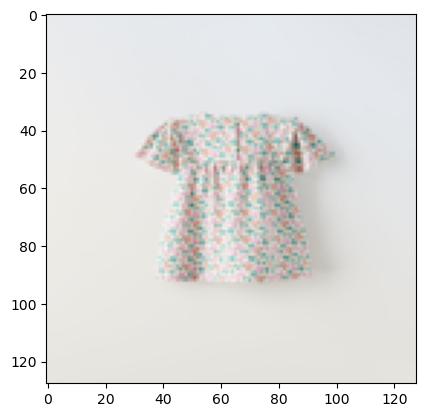

0.00705085043126135


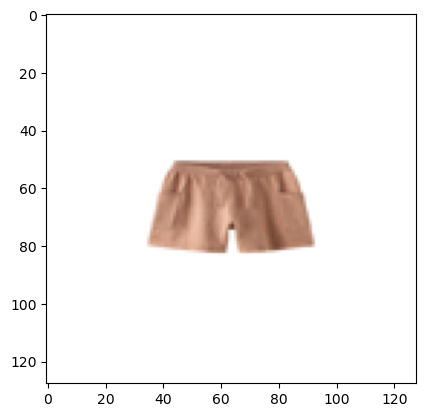

0.1437956688937044


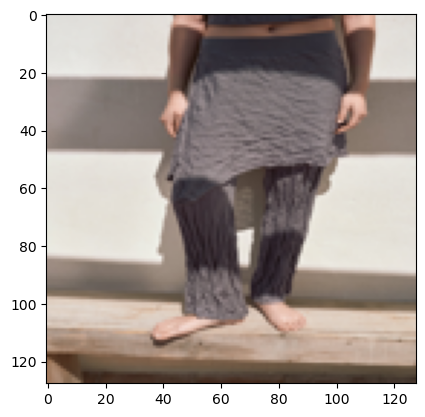

0.014095892229708905


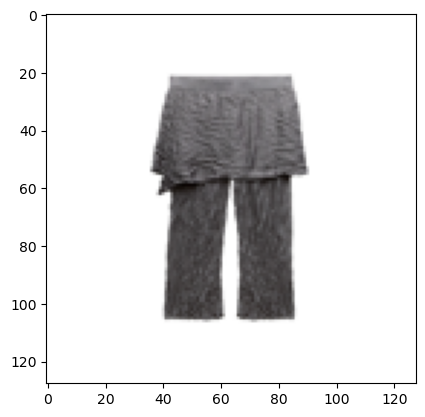

0.04694940088101549


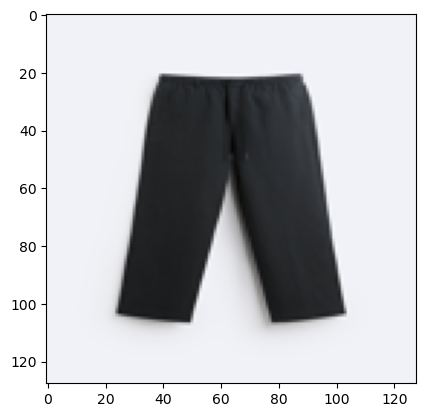

0.011493269098547605


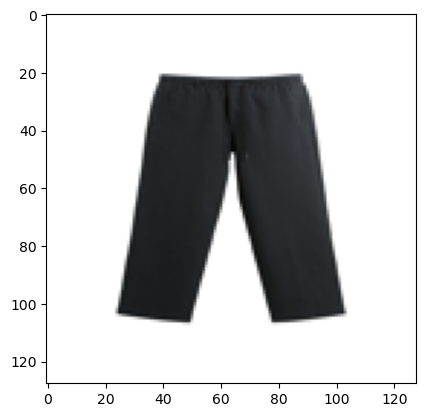

0.06420613770964423


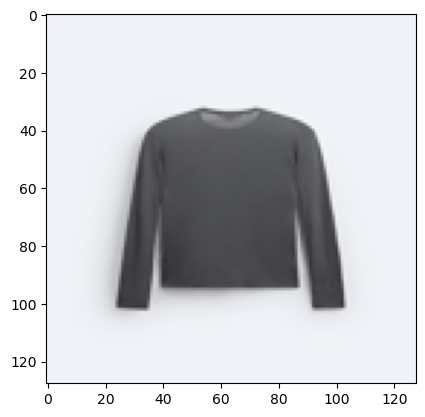

0.08843430080657015


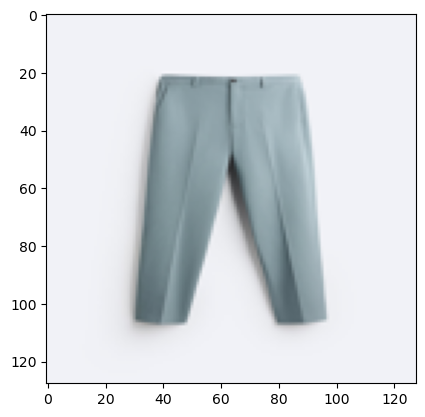

0.12370870536243497


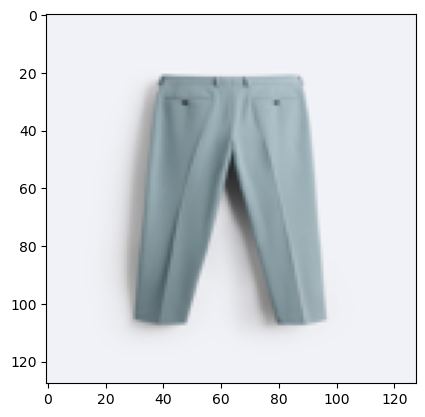

0.05036167630030394


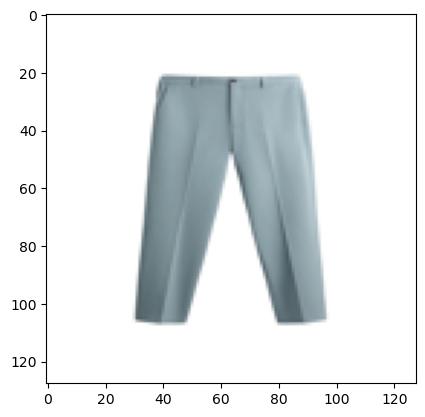

0.09815735941923155


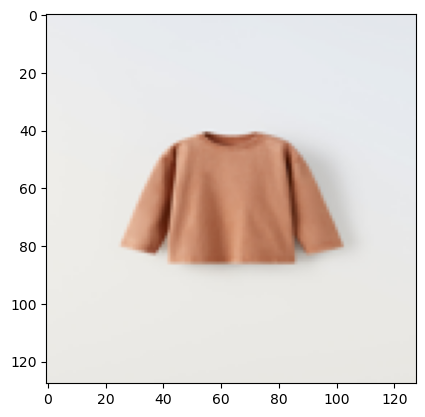

0.21954830174543488


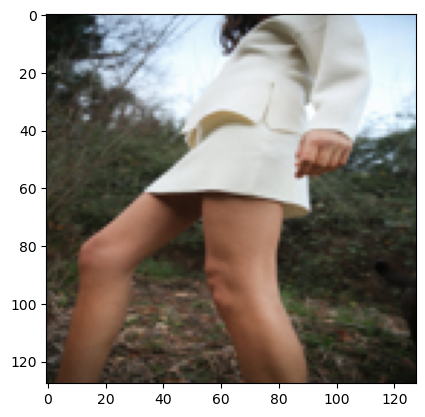

0.33460439654232244


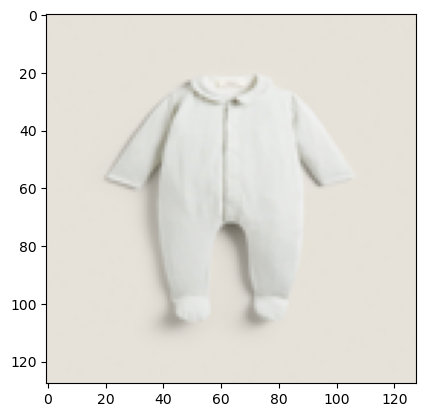

0.5566757787124277


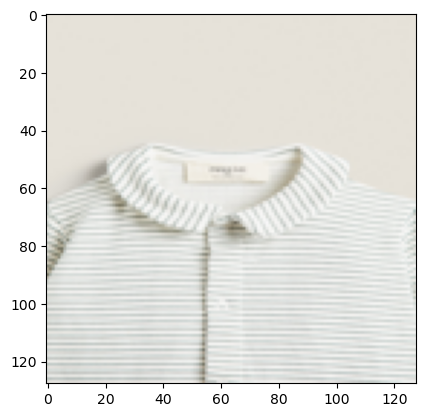

NameError: name 'rgbhistogram' is not defined

In [113]:
cnt = 0
rgbhists = []
# 64 x 64
for x in images:
    rgbhists.append(computehist(x))
    print(dist(rgbhists[-1],rgbhists[0]) / dist(rgbhists[0], rgbhists[0]))
    plt.imshow(x)
    plt.show()

print(rgbhistogram)
plt.imshow(images[0])
plt.show()

In [ ]:
def dist2(x, y):
    best_dist = 0
    
    for i1 in range(-1,2):
        for j1 in range(-1,2):
            for k1 in range(-1,2):
                cnt = 0
                
                for i in range(len(x)):
                    for j in range(len(x[0])):
                        for k in range(len(x[0][0])):
                            cnt += x[i][j][k] * y[i][j][k]

                best_dist = max(best_dist, cnt)

    return best_dist

In [115]:
dists = [[0 for __ in range(len(images))] for _ in range(len(images))] 

for i in range(len(images)):
    for j in range(len(images)):
        dists[i][j] = dist(rgbhists[i], rgbhists[j])

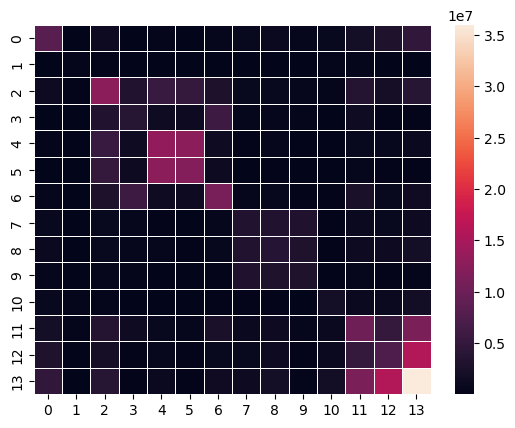

In [116]:
ax = sns.heatmap(dists, linewidth=0.5)
plt.show()

In [104]:
len(images)

209